In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("DataFinall.csv")

In [3]:
df.head()

,Medicine_Name,User_ID,Disease,Review_Text,Rating,Sentiment
0,Malaki Churna,User123,Indigestion,This churna works wonders! My digestion has im...,5,Positive
1,Malaki Churna,User124,Acid Reflux,Malaki Churna has been a lifesaver for my acid...,5,Positive
2,Malaki Churna,User125,Indigestion,I'm disappointed with Malaki Churna. It did no...,2,Negative
3,Malaki Churna,User126,Bloating,This churna is amazing! It has helped me regul...,4,Positive
4,Malaki Churna,User127,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2,Sarcastic


In [4]:
df.drop(['User_ID'], axis = 1, inplace=True)

In [5]:
df.head()

,Medicine_Name,Disease,Review_Text,Rating,Sentiment
0,Malaki Churna,Indigestion,This churna works wonders! My digestion has im...,5,Positive
1,Malaki Churna,Acid Reflux,Malaki Churna has been a lifesaver for my acid...,5,Positive
2,Malaki Churna,Indigestion,I'm disappointed with Malaki Churna. It did no...,2,Negative
3,Malaki Churna,Bloating,This churna is amazing! It has helped me regul...,4,Positive
4,Malaki Churna,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2,Sarcastic


In [6]:
df.Disease.value_counts().head(40)

Disease
Side Effects          73
Tolerance             73
Quality of Life       73
Long-term Use         73
Recommendation        73
Energy Boost          59
Respiratory Health    44
Joint Pain            39
Indigestion           35
Detox                 35
Weight Loss           27
Acidity               24
Immune Boost          23
Constipation          20
Acne                  18
Appetite Stimulant    16
Stress                15
Digestion             14
Skin Health           13
Anxiety               12
Memory                11
Arthritis             11
Bloating              11
Stress Relief         10
Inflammation           9
Kidney Health          9
Fatigue                8
Fever                  8
Muscle Pain            8
Concentration          7
Edema                  6
Blood Sugar            6
Massage Oil            5
Blood Cleansing        5
Depression             5
Allergies              5
Hair Growth            5
Anemia                 5
Kidney Stones          5
Bowel Regularity 

In [7]:
disease_counts = df['Disease'].value_counts()
df1 = df[df['Disease'].isin(disease_counts[disease_counts > 10].index)]

In [8]:
df1.head()

,Medicine_Name,Disease,Review_Text,Rating,Sentiment
0,Malaki Churna,Indigestion,This churna works wonders! My digestion has im...,5,Positive
2,Malaki Churna,Indigestion,I'm disappointed with Malaki Churna. It did no...,2,Negative
3,Malaki Churna,Bloating,This churna is amazing! It has helped me regul...,4,Positive
4,Malaki Churna,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2,Sarcastic
5,Malaki Churna,Indigestion,Malaki Churna? More like Malaki No-Churna! Did...,1,Positive


In [9]:
 df1.shape

(792, 5)

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

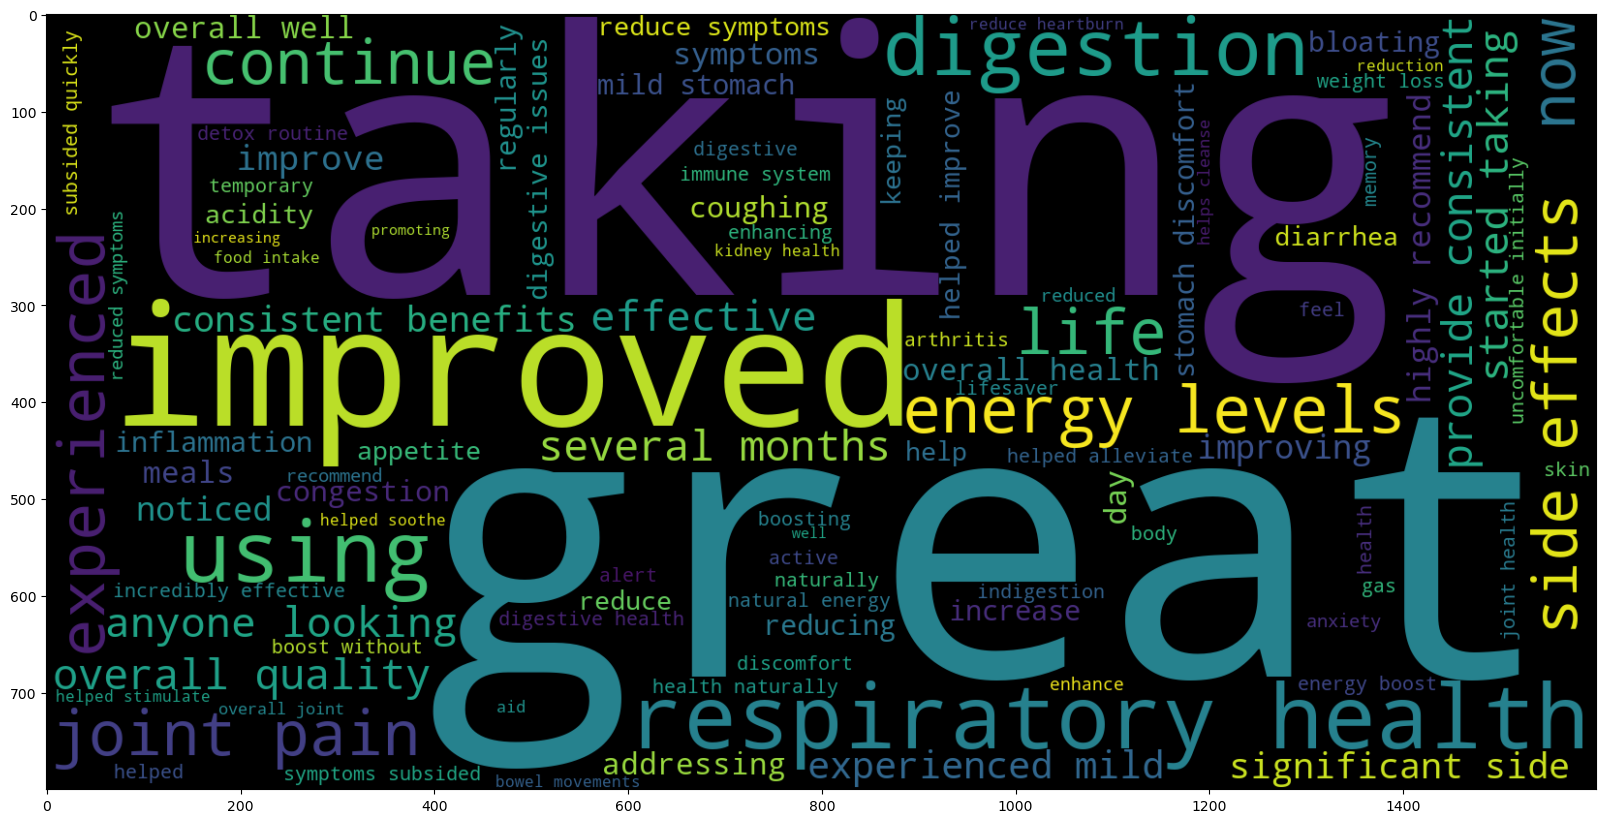

In [11]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 100, width = 1600, height = 800).generate(" ".join(df1.Review_Text))
plt.imshow(wc, interpolation= 'bilinear')

Text(0.5, 1.0, 'Word Cloud of Indigestion')

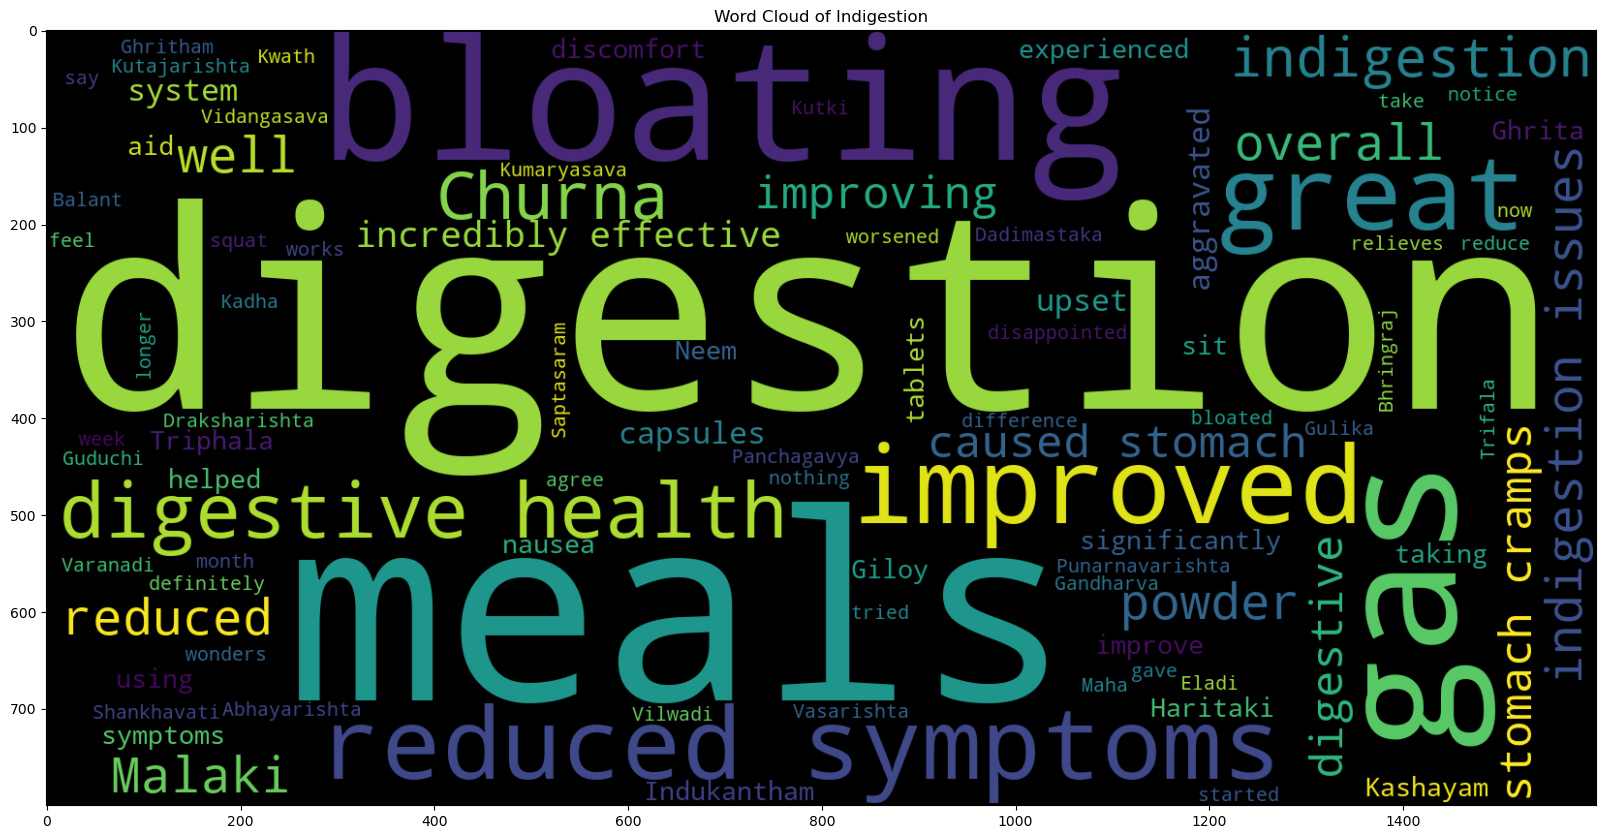

In [49]:
X_QOL = df1[df1['Disease'] == "Indigestion"]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 100, width = 1600, height = 800).generate(" ".join(X_QOL.Review_Text))
plt.imshow(wc, interpolation= 'bilinear')
plt.title("Word Cloud of Indigestion")

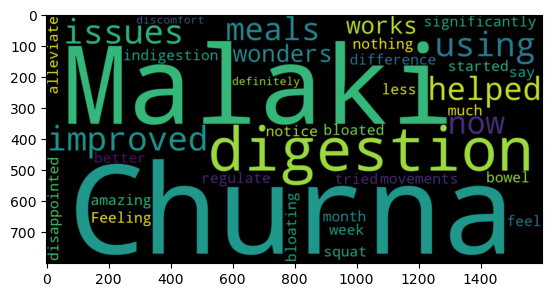

In [13]:
X_MKC = df1[df1['Medicine_Name'] == "Malaki Churna"]
wc = WordCloud(max_words = 100, width = 1600, height = 800).generate(" ".join(X_MKC.Review_Text))
plt.imshow(wc, interpolation= 'bilinear')

In [14]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [15]:
from nltk.stem import WordNetLemmatizer
lemmanizer = WordNetLemmatizer()

In [16]:
import re

In [17]:
def review_to_words(review):
    letters_only = re.sub('[^a-zA-Z]',' ', review)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    lemmaitized_words = [lemmanizer.lemmatize(w) for w in meaningful_words]
    return(' '.join(lemmaitized_words))

In [18]:
df2 = df1.copy()

In [19]:
df2['Clean_Review'] = df2['Review_Text'].apply(review_to_words)

In [20]:
df2.head()

,Medicine_Name,Disease,Review_Text,Rating,Sentiment,Clean_Review
0,Malaki Churna,Indigestion,This churna works wonders! My digestion has im...,5,Positive,churna work wonder digestion improved signific...
2,Malaki Churna,Indigestion,I'm disappointed with Malaki Churna. It did no...,2,Negative,disappointed malaki churna nothing indigestion...
3,Malaki Churna,Bloating,This churna is amazing! It has helped me regul...,4,Positive,churna amazing helped regulate bowel movement ...
4,Malaki Churna,Indigestion,"I tried Malaki Churna for a week, but I didn't...",2,Sarcastic,tried malaki churna week notice difference dig...
5,Malaki Churna,Indigestion,Malaki Churna? More like Malaki No-Churna! Did...,1,Positive,malaki churna like malaki churna squat


In [21]:
X = df2['Clean_Review']
y = df2['Disease']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
count_vectorizer = CountVectorizer(stop_words= 'english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [53]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_train, y_train)

y_pred = naive_bayes_classifier.predict(count_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9433962264150944


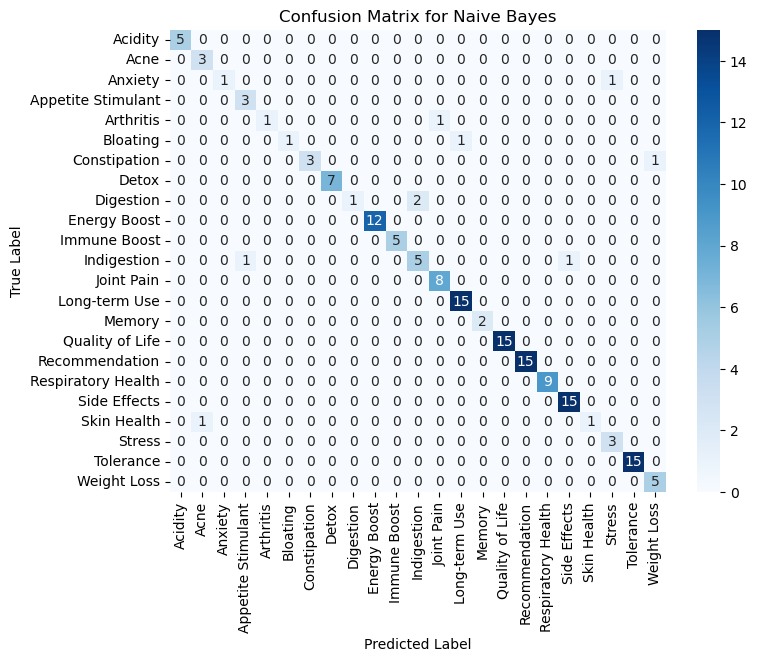

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive_aggressive_classifier = PassiveAggressiveClassifier()
passive_aggressive_classifier.fit(count_train, y_train)
y_pred_passive_aggressive = passive_aggressive_classifier.predict(count_test)
accuracy_passive_aggressive = accuracy_score(y_test, y_pred_passive_aggressive)
print("Passive Aggressive Classifier Accuracy:", accuracy_passive_aggressive)

Passive Aggressive Classifier Accuracy: 0.9559748427672956


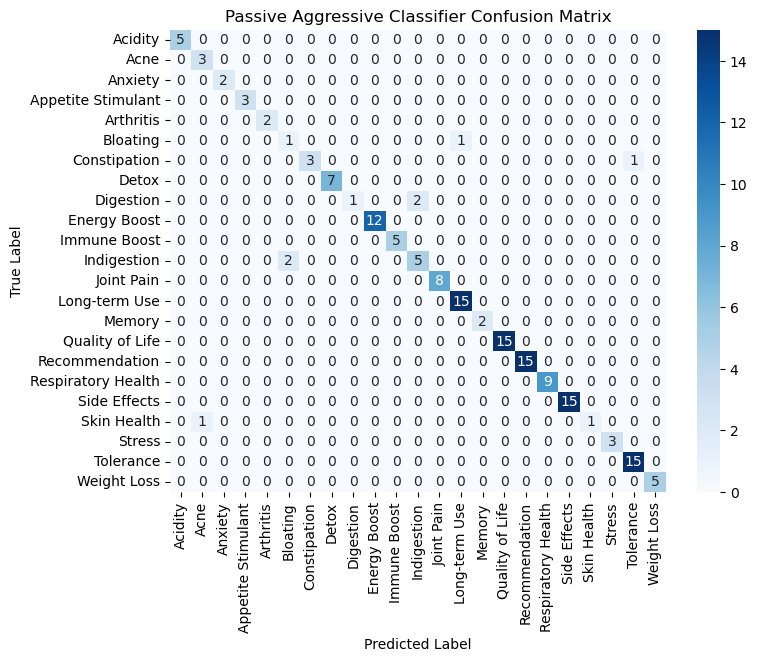

In [29]:
conf_matrix_passive_aggressive = confusion_matrix(y_test, y_pred_passive_aggressive)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_passive_aggressive, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Passive Aggressive Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
avg_sentiments = df.groupby(['Medicine_Name', 'Disease'])['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

In [31]:
avg_sentiments

Sentiment                          Negative  Positive  Sarcastic
Medicine_Name  Disease                                          
Abhayarishta   Appetite Stimulant       0.0       1.0        0.0
               Constipation             0.0       1.0        0.0
               Energy Boost             0.0       1.0        0.0
               Indigestion              0.0       1.0        0.0
               Long-term Use            0.0       1.0        0.0
...                                     ...       ...        ...
Yograj Guggulu Recommendation           0.0       1.0        0.0
               Respiratory Health       0.0       1.0        0.0
               Side Effects             1.0       0.0        0.0
               Stress Relief            0.0       1.0        0.0
               Tolerance                0.0       1.0        0.0

[1060 rows x 3 columns]

In [42]:
avg_sentiments['Score'] = 1*avg_sentiments['Positive'] - 1*avg_sentiments['Negative'] + 0*avg_sentiments['Sarcastic']
avg_sentiments

Sentiment                          Negative  Positive  Sarcastic  Score
Medicine_Name  Disease                                                 
Abhayarishta   Appetite Stimulant       0.0       1.0        0.0    1.0
               Constipation             0.0       1.0        0.0    1.0
               Energy Boost             0.0       1.0        0.0    1.0
               Indigestion              0.0       1.0        0.0    1.0
               Long-term Use            0.0       1.0        0.0    1.0
...                                     ...       ...        ...    ...
Yograj Guggulu Recommendation           0.0       1.0        0.0    1.0
               Respiratory Health       0.0       1.0        0.0    1.0
               Side Effects             1.0       0.0        0.0   -1.0
               Stress Relief            0.0       1.0        0.0    1.0
               Tolerance                0.0       1.0        0.0    1.0

[1060 rows x 4 columns]

In [33]:
best_medicine_per_disease = avg_sentiments.groupby(level='Disease')['Score'].idxmax()
best_medicine_per_disease

Disease
Acid Reflux                 (Malaki Churna, Acid Reflux)
Acidity                          (Balant Kadha, Acidity)
Acne                         (Brihatyadi Kashayam, Acne)
Acne Scars             (Nalpamaradi Thailam, Acne Scars)
Allergies                (Manjistha Capsules, Allergies)
                                   ...                  
UTI                            (Chandraprabha Vati, UTI)
Water Retention    (Punarnava Capsules, Water Retention)
Weakness                         (Kalabhashma, Weakness)
Weight Gain               (Ashoka Capsules, Weight Gain)
Weight Loss                   (Amla Powder, Weight Loss)
Name: Score, Length: 140, dtype: object

In [34]:
best_medicine = best_medicine_per_disease["Indigestion"]
best_medicine

('Abhayarishta', 'Indigestion')

In [35]:
def prediction(new_review):
    new_review_vectorized = count_vectorizer.transform([new_review]) 
    prediction = passive_aggressive_classifier.predict(new_review_vectorized)
    best_medicine = best_medicine_per_disease[prediction]
    print("Predicted label:", prediction[0])
    print("Best medicine for this disease:", best_medicine)

In [36]:
prediction("Malaki Churna helped me with the problem of my stomach")

Predicted label: Indigestion
Best medicine for this disease: Disease
Indigestion    (Abhayarishta, Indigestion)
Name: Score, dtype: object


In [38]:
prediction("Manjistha Capsules helped me with the problem of my reduce my weight")

Predicted label: Weight Loss
Best medicine for this disease: Disease
Weight Loss    (Amla Powder, Weight Loss)
Name: Score, dtype: object


In [39]:
prediction("I have been using Amla Powder for nearly 2 years now, I used to weight 80Kg and now I am 70Kg, I am very happy with it")

Predicted label: Weight Loss
Best medicine for this disease: Disease
Weight Loss    (Amla Powder, Weight Loss)
Name: Score, dtype: object


In [44]:
prediction("I have been suffring from Acne")

Predicted label: Acne
Best medicine for this disease: Disease
Acne    (Brihatyadi Kashayam, Acne)
Name: Score, dtype: object


In [45]:
prediction("I have been using Malaki Churna for my bloating, but its not that effective")

Predicted label: Bloating
Best medicine for this disease: Disease
Bloating    (Guggul Capsules, Bloating)
Name: Score, dtype: object


In [47]:
prediction("I have difficulty in remembering things")

Predicted label: Long-term Use
Best medicine for this disease: Disease
Long-term Use    (Abhayarishta, Long-term Use)
Name: Score, dtype: object


In [48]:
prediction("I have no energy throughout the day")

Predicted label: Energy Boost
Best medicine for this disease: Disease
Energy Boost    (Abhayarishta, Energy Boost)
Name: Score, dtype: object


In [52]:
prediction("I have problem in digesting my meals as I get bloating")

Predicted label: Bloating
Best medicine for this disease: Disease
Bloating    (Guggul Capsules, Bloating)
Name: Score, dtype: object
